In [1]:
import sys,os,pickle,copy
sys.path.append('/mnt/home/szheng/projects/seq_detection2/code')
sys.path.append('/mnt/home/szheng/projects/util_code')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis')
import numpy as np
import numpy
import pandas as pd
import scipy
import data_prep_new as dpn
import place_cell_analysis as pa
import plot_helper as ph
from importlib import reload
import seaborn as sns

import preprocess as prep

from sklearn.decomposition import NMF

import matplotlib as mpl
mpl.rcParams['image.cmap'] = 'Greys'
import matplotlib.pyplot as plt

import nmf_analysis as na
import nmf_plot as nmfp
reload(na)

<module 'nmf_analysis' from '/mnt/home/szheng/projects/nmf_analysis/nmf_analysis.py'>

In [2]:
sess_name="e15_13f1_220117"
py_data_dir = "/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220117/py_data"
fr_ = pickle.load(open(os.path.join(py_data_dir,'fr.p'),'rb'))
pos_bins = fr_['pos_bins']['lin']
bin_to_lin=numpy.concatenate([pos_bins[:-1,None],pos_bins[1:,None]],axis=1).mean(axis=1)

fr = fr_['df']['pyr']
fr_map_trial = pickle.load(open(os.path.join(py_data_dir,'fr_map.p'),'rb'))['fr_map_trial']
fr_map_avg=pickle.load(open(os.path.join(py_data_dir,'fr_map.p'),'rb'))['fr_map']
cell_cols = fr_['cell_cols']
cell_cols_pyr=np.array(cell_cols['pyr'],dtype=object)

In [3]:
data_dir_full = "/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220117"
to_return=prep.load_stuff(data_dir_full)

cell_metrics=to_return['cell_metrics']
behavior=to_return['behavior']
ripple_events=to_return['ripple_events']
mergepoints=to_return['mergepoints']
cell_type_mask=to_return['cell_type_mask']
pyr_uid=to_return['pyr_uid']

trial_ind_d = {ch:np.nonzero(behavior.trials.visitedArm==ch)[0] for ch in [0,1]}
dt = np.diff(behavior.timestamps).mean()

In [4]:
speed_thresh = 2.5
speed_mask = fr['speed'] > speed_thresh
speed_mask_slow = np.logical_not(speed_mask)
fr_d_fast = na.get_mean_fr_by_trial_types(fr,cell_cols_pyr,speed_mask)
fr_d_slow = na.get_mean_fr_by_trial_types(fr,cell_cols_pyr,speed_mask_slow)

In [6]:
fr_d_fast['0']

,unit_31,unit_32,unit_33,unit_34,unit_35,unit_36,unit_37,unit_38,unit_39,unit_40,...,unit_367,unit_368,unit_369,unit_370,unit_371,unit_372,unit_373,unit_374,unit_375,unit_376
trial,,,,,,,,,,,,,,,,,,,,,
0.0,0.094901,0.058074,0.022663,0.083569,0.060907,0.080737,0.077904,0.014164,0.002833,0.130312,...,0.007082,0.014164,0.005666,0.046742,0.026912,0.000000,0.001416,0.018414,0.001416,0.042493
2.0,0.135135,0.027027,0.028314,0.083655,0.087516,0.081081,0.055341,0.018018,0.001287,0.137709,...,0.007722,0.064350,0.021879,0.034749,0.056628,0.000000,0.006435,0.015444,0.000000,0.023166
4.0,0.091034,0.064828,0.060690,0.063448,0.111724,0.092414,0.045517,0.038621,0.002759,0.114483,...,0.026207,0.019310,0.016552,0.052414,0.023448,0.000000,0.005517,0.028966,0.000000,0.053793
6.0,0.106383,0.048463,0.101655,0.089835,0.091017,0.075650,0.055556,0.035461,0.003546,0.060284,...,0.055556,0.068558,0.014184,0.018913,0.003546,0.000000,0.003546,0.028369,0.000000,0.036643
11.0,0.121926,0.070697,0.047131,0.067623,0.092213,0.107582,0.043033,0.043033,0.002049,0.077869,...,0.028689,0.039959,0.003074,0.027664,0.019467,0.000000,0.003074,0.033811,0.007172,0.018443
12.0,0.084980,0.058300,0.030632,0.089921,0.061265,0.108696,0.035573,0.066206,0.000988,0.095850,...,0.007905,0.032609,0.000000,0.021739,0.013834,0.000000,0.002964,0.040514,0.010870,0.016798
13.0,0.098639,0.058673,0.048469,0.073980,0.074830,0.111395,0.047619,0.037415,0.004252,0.056973,...,0.022959,0.047619,0.000850,0.018707,0.018707,0.000000,0.003401,0.051871,0.003401,0.011054
15.0,0.102319,0.069577,0.008186,0.036835,0.070941,0.100955,0.030014,0.043656,0.002729,0.111869,...,0.032742,0.005457,0.028649,0.020464,0.008186,0.000000,0.001364,0.025921,0.001364,0.004093
17.0,0.129323,0.046617,0.004511,0.046617,0.075188,0.099248,0.084211,0.042105,0.003008,0.091729,...,0.025564,0.016541,0.004511,0.021053,0.003008,0.000000,0.004511,0.028571,0.010526,0.015038


In [21]:
fr.loc[speed_mask]

,unit_31,unit_32,unit_33,unit_34,unit_35,unit_36,unit_37,unit_38,unit_39,unit_40,...,lin,vel_x,vel_y,vel_lin,speed,visitedArm,trial,x_binned,y_binned,lin_binned
203,0,0,0,0,0,0,0,0,0,0,...,3.131094,1.548285,2.763368,74.525134,3.167553,0.0,0.0,83,51,1
204,0,0,0,0,0,0,0,0,0,0,...,3.131094,1.467966,2.756942,74.563182,3.123404,0.0,0.0,83,52,1
205,0,0,0,0,0,0,0,0,0,0,...,218.728170,1.388223,2.746598,74.516363,3.077493,0.0,0.0,83,52,98
206,0,0,1,1,0,0,0,0,0,0,...,218.374458,1.309232,2.732427,74.385339,3.029892,0.0,0.0,83,52,98
207,0,0,1,0,0,0,0,0,0,0,...,217.843891,1.231307,2.714397,74.170967,2.980616,0.0,0.0,83,53,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55222,0,0,0,0,0,0,0,1,0,0,...,217.755463,3.144435,-0.454809,0.344580,3.177156,1.0,34.0,99,52,98
55223,0,0,1,0,0,0,0,0,0,0,...,217.667035,3.012623,-0.435520,0.324841,3.043941,1.0,34.0,99,52,98
55224,0,0,0,0,0,0,0,0,0,0,...,217.578608,2.875717,-0.415577,0.305567,2.905590,1.0,34.0,99,52,98
55225,1,0,0,0,0,0,0,0,0,0,...,217.401752,2.733893,-0.394982,0.286684,2.762279,1.0,34.0,99,53,97


In [5]:
window_size=80
fr_reduced = fr.loc[speed_mask].query('visitedArm==0').rolling(window=window_size)[cell_cols_pyr].mean().iloc[window_size::window_size]

times_reduced = fr.loc[speed_mask].query('visitedArm==0').rolling(window=window_size)['times'].min().iloc[window_size::window_size]
times_reduced = np.round(times_reduced,2)
position_reduced = fr.loc[speed_mask].query('visitedArm==0').rolling(window=window_size)['lin'].mean().iloc[window_size::window_size]

In [7]:
reload(na)

<module 'nmf_analysis' from '/mnt/home/szheng/projects/nmf_analysis/nmf_analysis.py'>

In [8]:
X,fr_na_ma,non_na_original_ind = na.normalize(fr_reduced.T.values)
n_compo=20
model, W_sorted,W_inds, factor_assignment, H_sorted, X_sorted, X_recon_sorted = na.nmf_and_sort(X[fr_na_ma],n_compo)



/mnt/home/szheng/projects/nmf_analysis/nmf_analysis.py:51: RuntimeWarning: invalid value encountered in true_divide
  X_normed = X / row_norm_constant


In [265]:
reload(na)
reload(nmfp)

<module 'nmf_plot' from '/mnt/home/szheng/projects/nmf_analysis/nmf_plot.py'>

(<Figure size 2937.6x2390.4 with 4 Axes>,
 {'W': <AxesSubplot:label='W', xlabel='component', ylabel='neuron'>,
  'H': <AxesSubplot:label='H', ylabel='component'>})

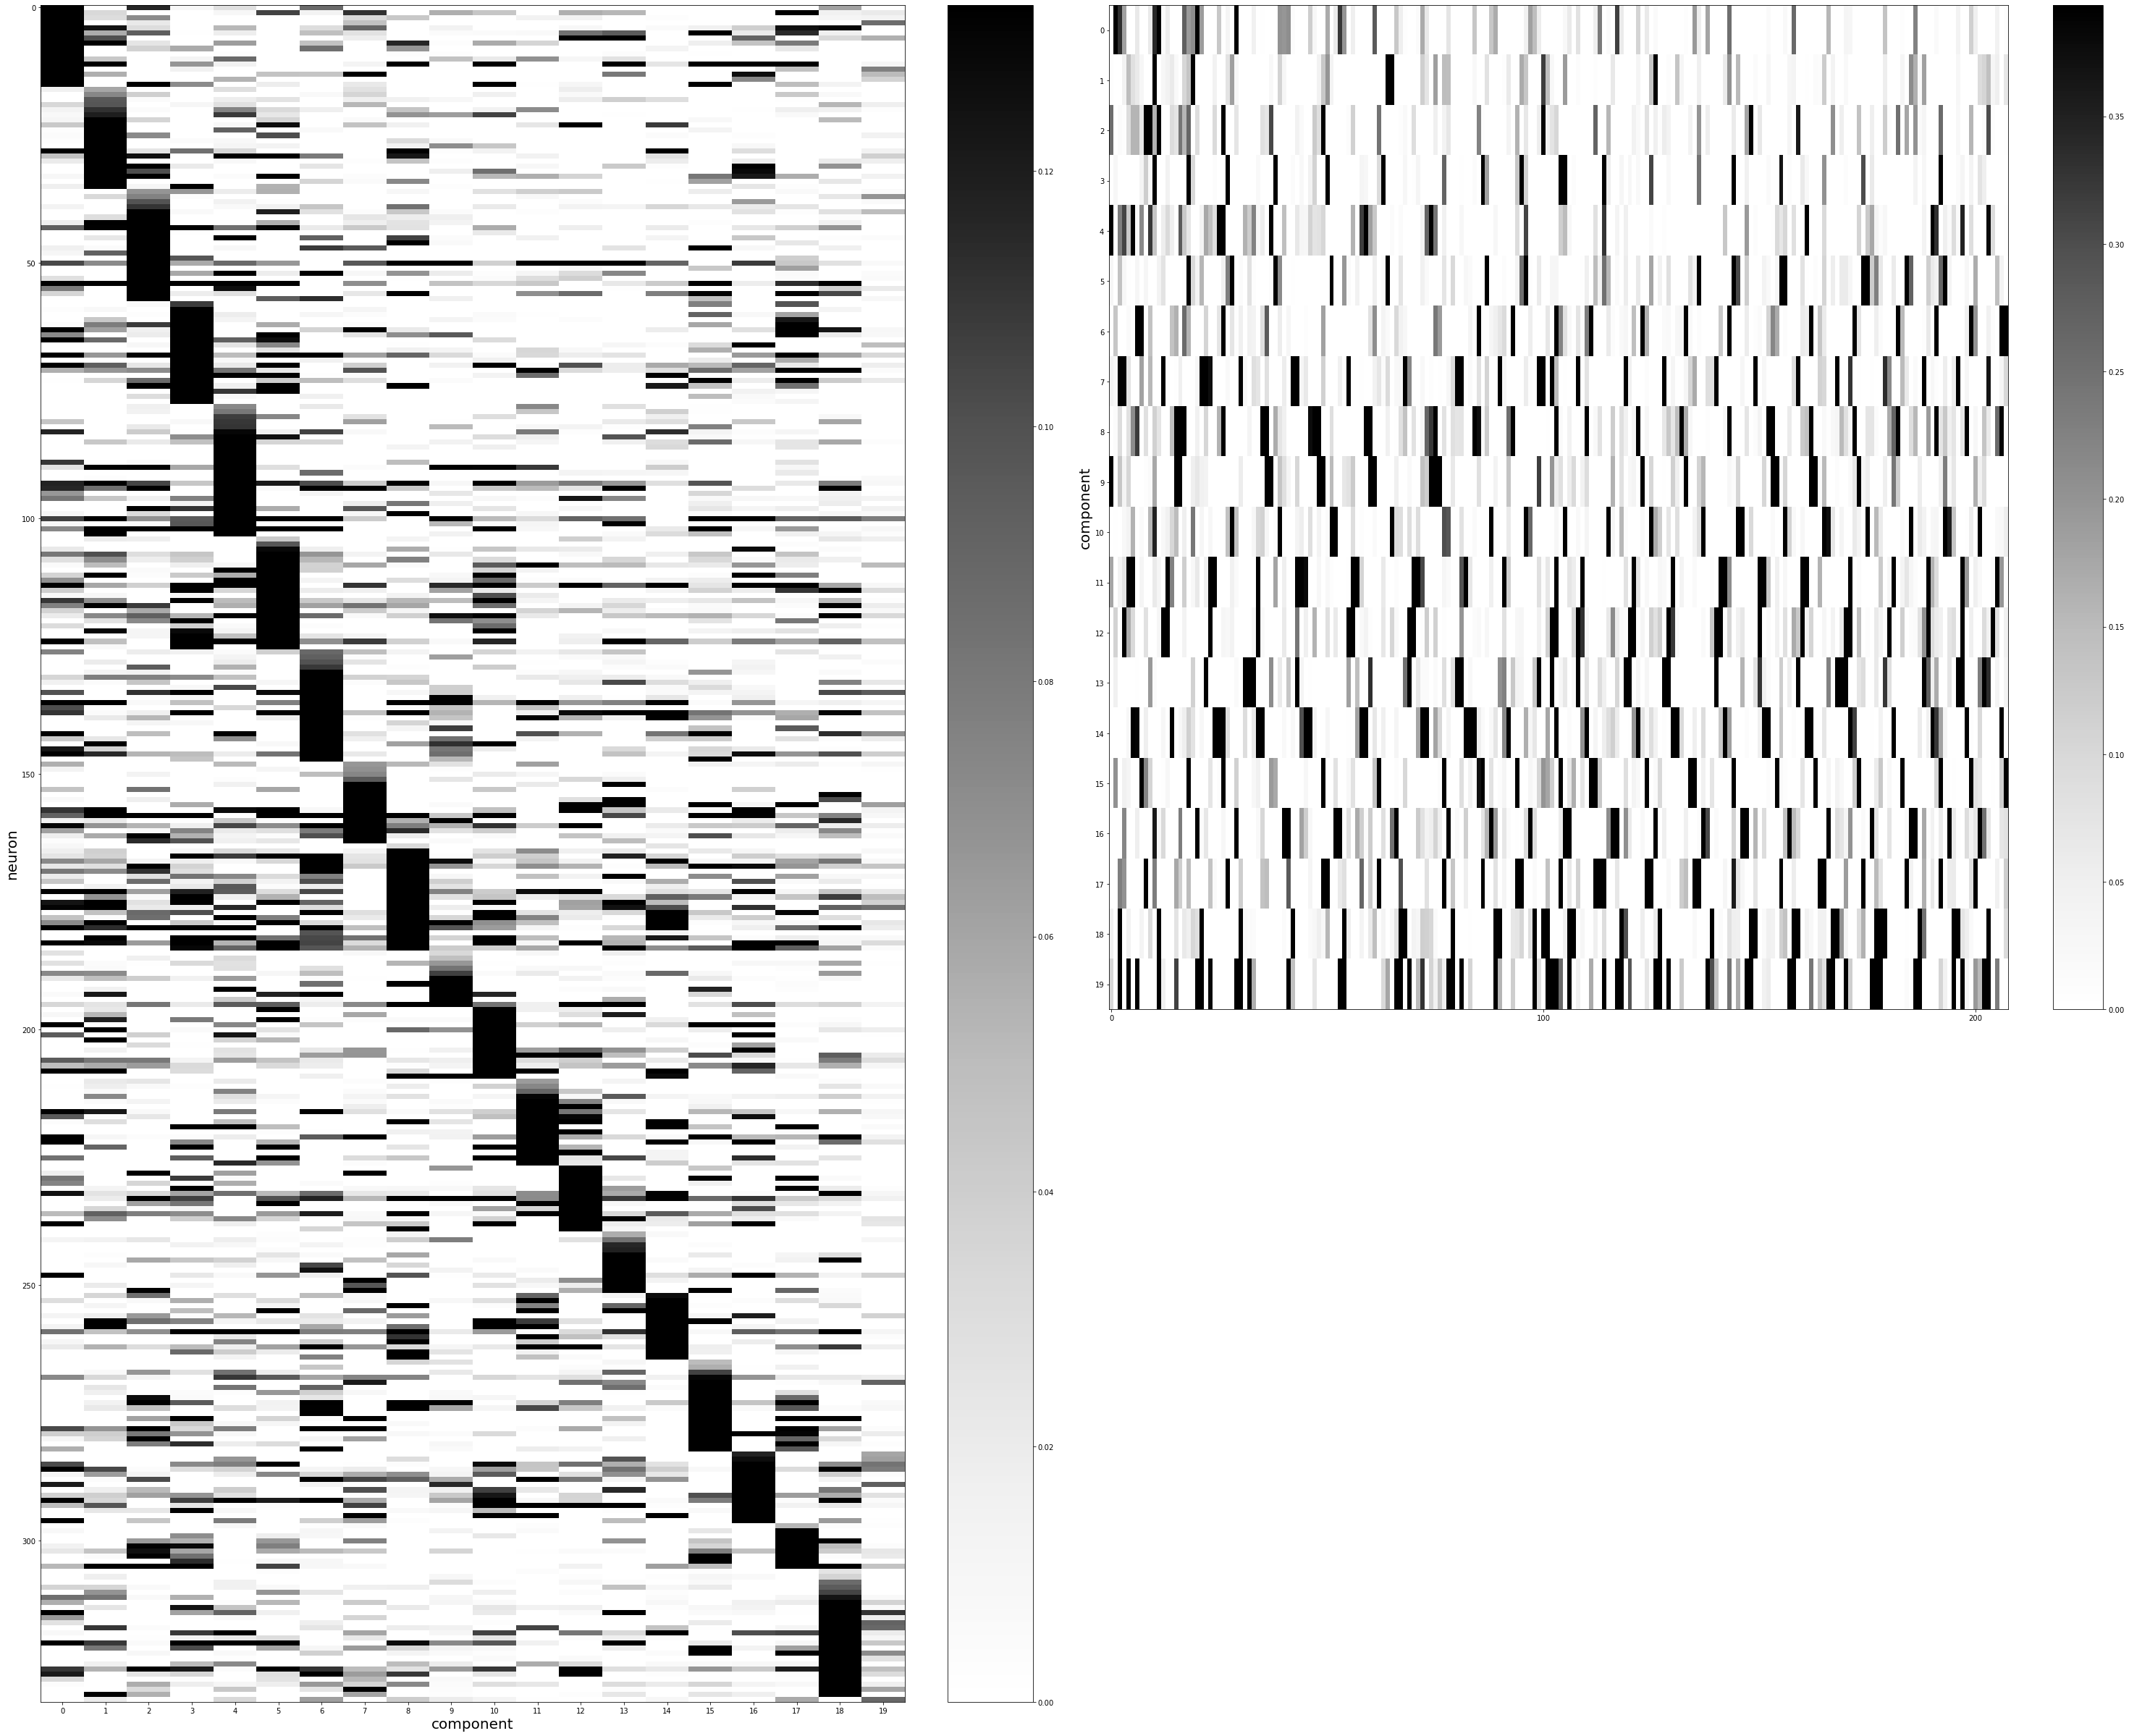

In [16]:
nmfp.plot_wh(W_sorted,H_sorted,factor_neuron_ratio=10,scale=1,factor_trial_ratio=10,spacing=100)

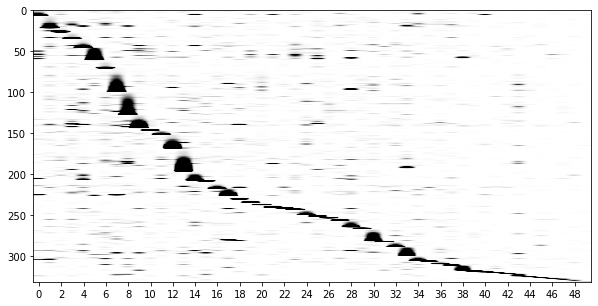

In [284]:
fig,ax=plt.subplots(figsize=(10,5))
ax.imshow(W_sorted,aspect='auto',vmax=np.quantile(H_sorted_cc,0.9))
ax.set_xticks(np.arange(0,n_compo,2))

In [19]:
cc_inds_aftersorted,H_sorted_cc = na.get_order_using_cross_correlation(H_sorted,truncate=500)

In [22]:
cc_inds_aftersorted

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [24]:
H_sorted_cc

(20, 208)

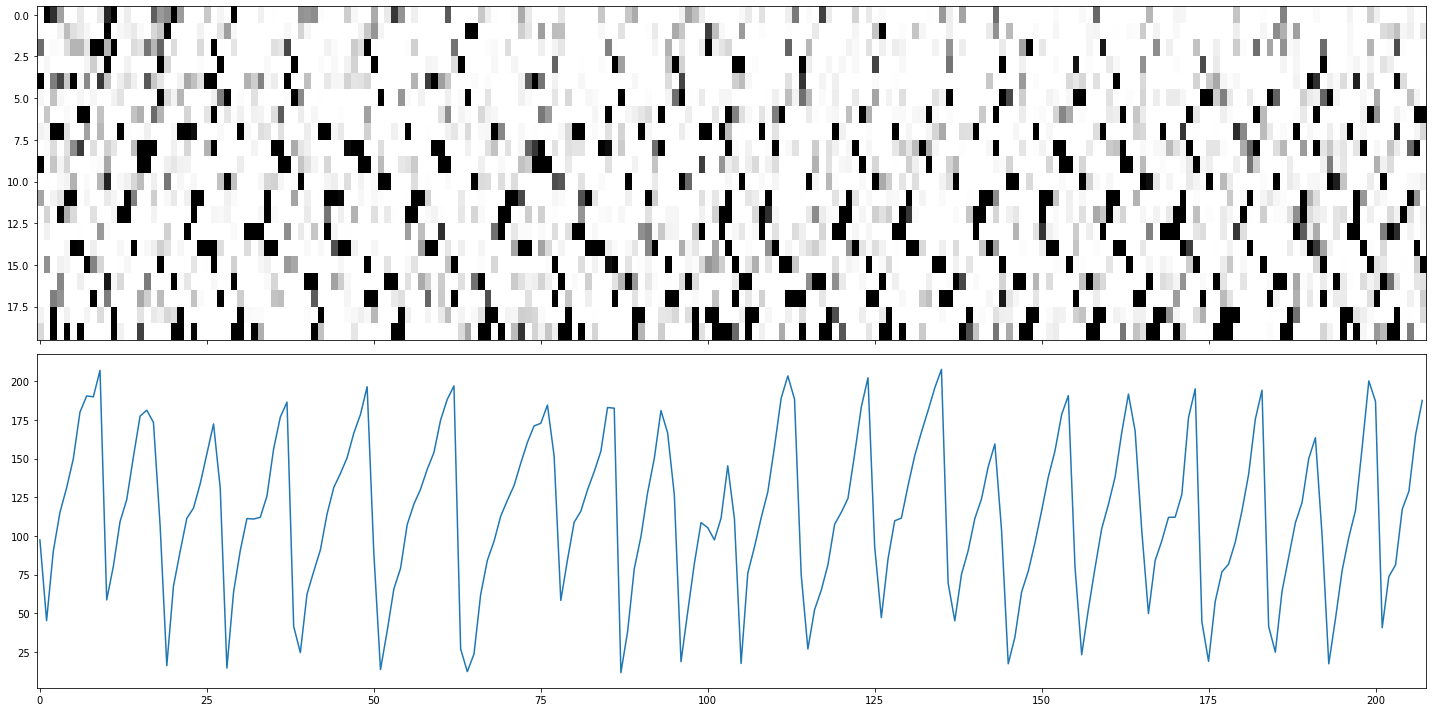

In [25]:
fig,axs=plt.subplots(2,1,figsize=(20,10),sharex=True)
# fig,axs[0]=nmfp.plot_X_sorted(X_sorted,fig=fig,ax=axs[0],spacing=100)
axs[0].imshow(H_sorted,aspect='auto',vmax=np.quantile(H_sorted,0.9))
# axs[0].imshow(H_sorted_cc,aspect='auto',vmax=np.quantile(H_sorted_cc,0.9))
axs[1].plot(position_reduced.values)
# axs[0].set_xlim([2000,6000])
plt.tight_layout()


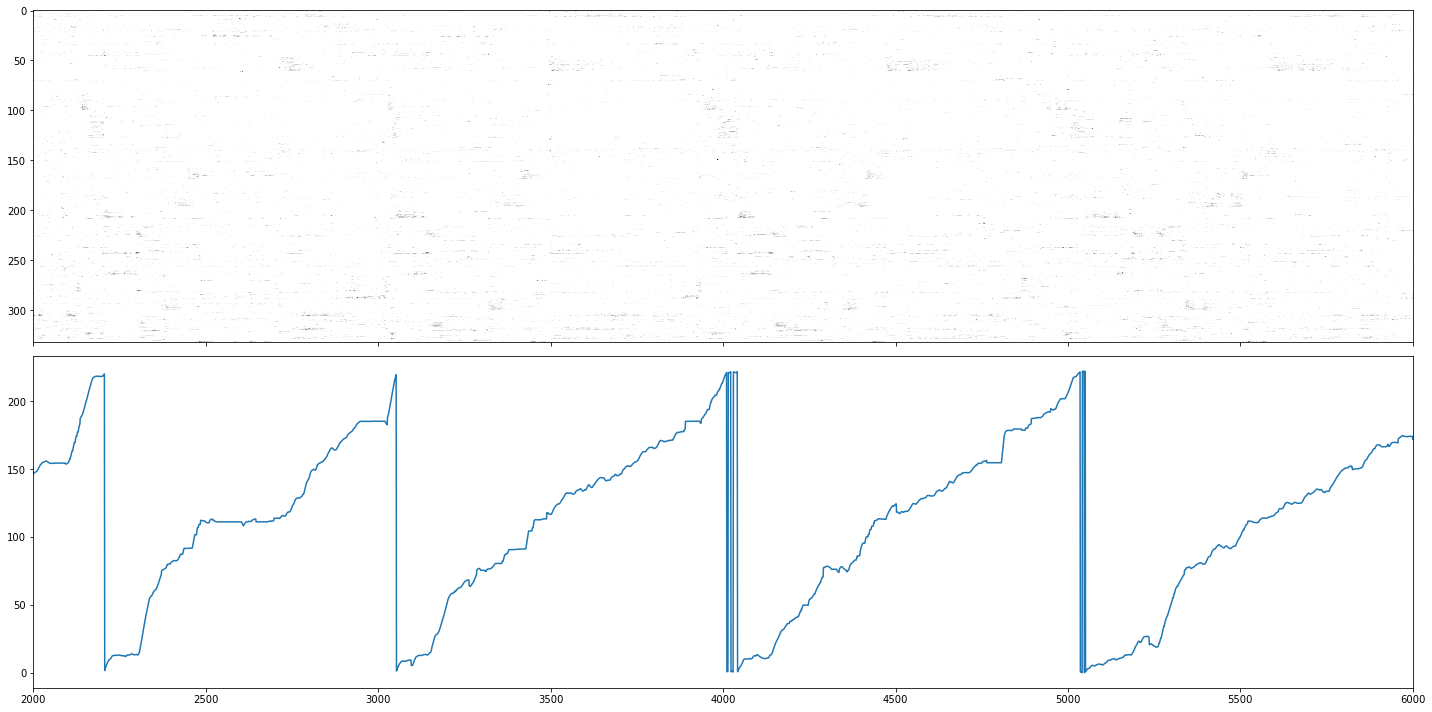

In [286]:
fig,axs=plt.subplots(2,1,figsize=(20,10),sharex=True)
# fig,axs[0]=nmfp.plot_X_sorted(X_sorted,fig=fig,ax=axs[0],spacing=100)
axs[0].imshow(X_sorted,aspect='auto')
axs[1].plot(position_reduced.values)
axs[0].set_xlim([2000,6000])
plt.tight_layout()

<AxesSubplot:xlabel='lin_binned'>

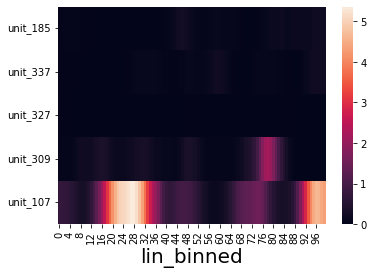

In [289]:
clust=2
original_ind_one_factor=non_na_original_ind[W_inds[factor_assignment==clust]]

sns.heatmap(fr_map_avg[0].iloc[original_ind_one_factor])

In [235]:
# sorting by cross correlation peak; does not seem to work that well; but worth investigating why
import scipy.signal as ss
truncate=2000
H = H_sorted
n_compo = H.shape[0]
order_mat = np.zeros((n_compo,n_compo))
for i in range(n_compo):
    for j in range(i+1,n_compo):
        c = ss.correlate(H_sorted[i,:truncate],H_sorted[j,:truncate])
        order_mat[i,j] = np.argmax(c) > truncate # positive peak, i later than j
order_mat = order_mat + np.tril(1-order_mat.T) - np.eye(n_compo)
# np.triu()
H_sorted_cc = H_sorted[np.argsort(order_mat.sum(axis=1))]

In [237]:
order_mat

array([[0., 0., 1., 0., 0., 0., 1., 1., 0., 0.],
       [1., 0., 0., 0., 1., 1., 1., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 1., 1., 0., 1.],
       [1., 1., 1., 0., 1., 1., 0., 0., 1., 0.],
       [1., 0., 1., 0., 0., 1., 1., 1., 0., 0.],
       [1., 0., 1., 0., 0., 0., 1., 1., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0., 1., 0., 1.],
       [0., 1., 0., 1., 0., 0., 0., 0., 0., 1.],
       [1., 0., 1., 0., 1., 1., 1., 1., 0., 0.],
       [1., 1., 0., 1., 1., 0., 0., 0., 1., 0.]])

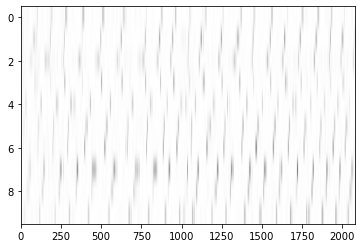

In [236]:
plt.imshow(H_sorted_cc,aspect='auto')